In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

## import file

In [2]:
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

In [25]:
list(fake_news)

['title', 'text', 'fake']

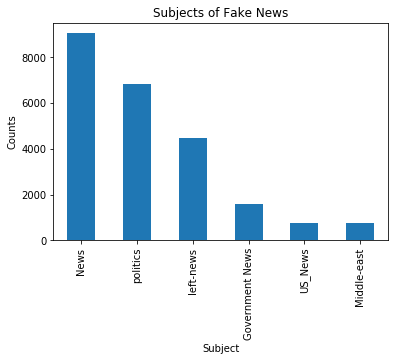

In [4]:
fake_news.subject.value_counts().plot(kind = 'bar')
plt.xlabel('Subject')
plt.ylabel('Counts')
plt.title('Subjects of Fake News')
plt.show()

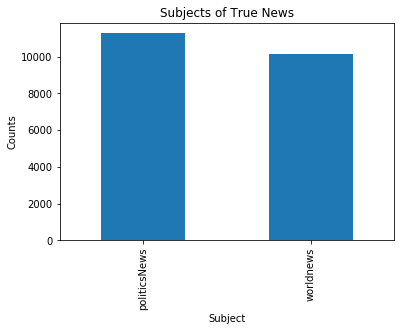

In [6]:
real_news.subject.value_counts().plot(kind = 'bar')
plt.xlabel('Subject')
plt.ylabel('Counts')
plt.title('Subjects of True News')
plt.show()

In [ ]:
## remove unnecessary parts - subject, date

In [21]:
fake_news = fake_news.drop(['subject', 'date'], axis = 1)
true_news = real_news.drop(['subject', 'date'], axis = 1)

In [22]:
fake_news.insert(2, 'fake', 1)
true_news.insert(2, 'fake', 0)

In [23]:
news = fake_news.append(true_news)

In [ ]:
## count the number of documents in each dataframe

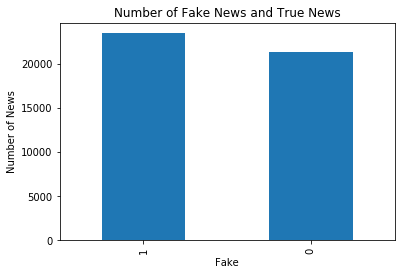

In [24]:
import matplotlib.pyplot as plt
news['fake'].value_counts().plot(kind = 'bar')
plt.xlabel('Fake')
plt.ylabel('Number of News')
plt.title('Number of Fake News and True News')
plt.show()

In [25]:
print(f"number of fake news: {len(fake_news)}, number of real news: {len(real_news)}")

number of fake news: 23481, number of real news: 21417


## division to training & test data
### mind: balanced training dataset

In [39]:
# divide data into training, test set 80:20 --- since true news is fewer, set the number of training set = # of test set
n_samples = int(len(real_news)*0.8)

import random
random.seed(12345)

fake_ind = random.sample(range(len(fake_news)), n_samples)
true_ind = random.sample(range(len(true_news)), n_samples)
test_fake = [x for x in [*range(len(fake_news))] if x not in fake_ind]
test_true = [x for x in [*range(len(true_news))] if x not in true_ind]

In [40]:
train_fake_data = fake_news.iloc[fake_ind, :]
train_true_data = true_news.iloc[true_ind, :]
test_fake_data = fake_news.iloc[test_fake, :]
test_true_data = true_news.iloc[test_true, :]

In [43]:
train_data = train_fake_data.append(train_true_data)
test_data = test_fake_data.append(test_true_data)

In [47]:
train_data.to_csv('train_data.csv', index = False)
test_data.to_csv('test_data.csv', index = False)

## construct pipeline for each model with different vectorizers (remove stopword -- dont. 왜냐하면 reference, different n-grams)

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
import re

In [5]:
def preprocess(content):
    
    # remove contractions (ref: https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert)
    
    content = re.sub(r"he's", "he is", str(content))
    content = re.sub(r"there's", "there is", str(content))
    content = re.sub(r"We're", "We are", str(content))
    content = re.sub(r"That's", "That is", str(content))
    content = re.sub(r"won't", "will not", str(content))
    content = re.sub(r"they're", "they are", str(content))
    content = re.sub(r"Can't", "Cannot", str(content))
    content = re.sub(r"wasn't", "was not", str(content))
    content = re.sub(r"aren't", "are not", str(content))
    content = re.sub(r"isn't", "is not", str(content))
    content = re.sub(r"What's", "What is", str(content))
    content = re.sub(r"haven't", "have not", str(content))
    content = re.sub(r"hasn't", "has not", str(content))
    content = re.sub(r"There's", "There is", str(content))
    content = re.sub(r"He's", "He is", str(content))
    content = re.sub(r"It's", "It is", str(content))
    content = re.sub(r"You're", "You are", str(content))
    content = re.sub(r"I'M", "I am", str(content))
    content = re.sub(r"shouldn't", "should not", str(content))
    content = re.sub(r"wouldn't", "would not", str(content))
    content = re.sub(r"i'm", "I am", str(content))
    content = re.sub(r"I'm", "I am", str(content))
    content = re.sub(r"Isn't", "is not", str(content))
    content = re.sub(r"Here's", "Here is", str(content))
    content = re.sub(r"you've", "you have", str(content))
    content = re.sub(r"we're", "we are", str(content))
    content = re.sub(r"what's", "what is", str(content))
    content = re.sub(r"couldn't", "could not", str(content))
    content = re.sub(r"we've", "we have", str(content))
    content = re.sub(r"who's", "who is", str(content))
    content = re.sub(r"y'all", "you all", str(content))
    content = re.sub(r"would've", "would have", str(content))
    content = re.sub(r"it'll", "it will", str(content))
    content = re.sub(r"we'll", "we will", str(content))
    content = re.sub(r"We've", "We have", str(content))
    content = re.sub(r"he'll", "he will", str(content))
    content = re.sub(r"Y'all", "You all", str(content))
    content = re.sub(r"Weren't", "Were not", str(content))
    content = re.sub(r"Didn't", "Did not", str(content))
    content = re.sub(r"they'll", "they will", str(content))
    content = re.sub(r"they'd", "they would", str(content))
    content = re.sub(r"DON'T", "DO NOT", str(content))
    content = re.sub(r"they've", "they have", str(content))
    content = re.sub(r"i'd", "I would", str(content))
    content = re.sub(r"should've", "should have", str(content))
    content = re.sub(r"where's", "where is", str(content))
    content = re.sub(r"we'd", "we would", str(content))
    content = re.sub(r"i'll", "I will", str(content))
    content = re.sub(r"weren't", "were not", str(content))
    content = re.sub(r"They're", "They are", str(content))
    content = re.sub(r"let's", "let us", str(content))
    content = re.sub(r"it's", "it is", str(content))
    content = re.sub(r"can't", "cannot", str(content))
    content = re.sub(r"don't", "do not", str(content))
    content = re.sub(r"you're", "you are", str(content))
    content = re.sub(r"i've", "I have", str(content))
    content = re.sub(r"that's", "that is", str(content))
    content = re.sub(r"i'll", "I will", str(content))
    content = re.sub(r"doesn't", "does not", str(content))
    content = re.sub(r"i'd", "I would", str(content))
    content = re.sub(r"didn't", "did not", str(content))
    content = re.sub(r"ain't", "am not", str(content))
    content = re.sub(r"you'll", "you will", str(content))
    content = re.sub(r"I've", "I have", str(content))
    content = re.sub(r"Don't", "do not", str(content))
    content = re.sub(r"I'll", "I will", str(content))
    content = re.sub(r"I'd", "I would", str(content))
    content = re.sub(r"Let's", "Let us", str(content))
    content = re.sub(r"you'd", "You would", str(content))
    content = re.sub(r"It's", "It is", str(content))
    content = re.sub(r"Ain't", "am not", str(content))
    content = re.sub(r"Haven't", "Have not", str(content))
    content = re.sub(r"Could've", "Could have", str(content))
    content = re.sub(r"youve", "you have", str(content))
    
    # remove hyperlinks
    content = re.sub("http\S+", '', str(content))
    
    return content    

In [6]:
train.title = train.title.map(lambda x: preprocess(x))
train.text = train.text.map(lambda x: preprocess(x))

test.title = test.title.map(lambda x: preprocess(x))
test.text = test.text.map(lambda x: preprocess(x))

In [7]:
trainX1, trainX2, trainY = train.title, train.text, train.fake
testX1, testX2, testY = test.title, test.text, test.fake

In [8]:
# constructing pipelining steps

## svm -- as a baseline
from sklearn.svm import SVC
uni_csvm1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('svm', SVC())])
bi_csvm1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('svm', SVC())])
tri_csvm1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('svm', SVC())])

uni_csvm2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('svm', SVC())])
bi_csvm2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('svm', SVC())])
tri_csvm2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('svm', SVC())])


uni_tfsvm1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('svm', SVC())])
bi_tfsvm1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('svm', SVC())])
tri_tfsvm1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('svm', SVC())])

uni_tfsvm2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('svm', SVC())])
bi_tfsvm2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('svm', SVC())])
tri_tfsvm2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('svm', SVC())])

## NaiveBayes
from sklearn.naive_bayes import BernoulliNB as NB # as there are only two classes - fake or not
uni_cnb1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('nb', NB())])
bi_cnb1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('nb', NB())])
tri_cnb1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('nb', NB())])

uni_cnb2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('nb', NB())])
bi_cnb2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('nb', NB())])
tri_cnb2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('nb', NB())])


uni_tfnb1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('nb', NB())])
bi_tfnb1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('nb', NB())])
tri_tfnb1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('nb', NB())])

uni_tfnb2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('nb', NB())])
bi_tfnb2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('nb', NB())])
tri_tfnb2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('nb', NB())])

## Decision tree
from sklearn.tree import DecisionTreeClassifier as DT
uni_cdt1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('dt', DT(random_state = 0))])
bi_cdt1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('dt', DT(random_state = 0))])
tri_cdt1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('dt', DT(random_state = 0))])

uni_cdt2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 1))), ('dt', DT(random_state = 0))])
bi_cdt2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(2, 2))), ('dt', DT(random_state = 0))])
tri_cdt2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3, 3))), ('dt', DT(random_state = 0))])


uni_tfdt1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('dt', DT(random_state = 0))])
bi_tfdt1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('dt', DT(random_state = 0))])
tri_tfdt1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('dt', DT(random_state = 0))])

uni_tfdt2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 1))), ('dt', DT(random_state = 0))])
bi_tfdt2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(2, 2))), ('dt', DT(random_state = 0))])
tri_tfdt2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(3, 3))), ('dt', DT(random_state = 0))])

## train and test the models
### train the models

In [9]:
# train by title
## SVM as baseline
uni_csvm1.fit(trainX1, trainY)
bi_csvm1.fit(trainX1, trainY)
tri_csvm1.fit(trainX1, trainY)

uni_tfsvm1.fit(trainX1, trainY)
bi_tfsvm1.fit(trainX1, trainY)
tri_tfsvm1.fit(trainX1, trainY)

## NB classifier
uni_cnb1.fit(trainX1, trainY)
bi_cnb1.fit(trainX1, trainY)
tri_cnb1.fit(trainX1, trainY)

uni_tfnb1.fit(trainX1, trainY)
bi_tfnb1.fit(trainX1, trainY)
tri_tfnb1.fit(trainX1, trainY)

## DT classifier
uni_cdt1.fit(trainX1, trainY)
bi_cdt1.fit(trainX1, trainY)
tri_cdt1.fit(trainX1, trainY)

uni_tfdt1.fit(trainX1, trainY)
bi_tfdt1.fit(trainX1, trainY)
tri_tfdt1.fit(trainX1, trainY)

# train by text
## SVM as baseline
uni_csvm2.fit(trainX2, trainY)
bi_csvm2.fit(trainX2, trainY)
tri_csvm2.fit(trainX2, trainY)

uni_tfsvm2.fit(trainX2, trainY)
bi_tfsvm2.fit(trainX2, trainY)
tri_tfsvm2.fit(trainX2, trainY)

## NB classifier
uni_cnb2.fit(trainX2, trainY)
bi_cnb2.fit(trainX2, trainY)
tri_cnb2.fit(trainX2, trainY)

uni_tfnb2.fit(trainX2, trainY)
bi_tfnb2.fit(trainX2, trainY)
tri_tfnb2.fit(trainX2, trainY)

## DT classifier
uni_cdt2.fit(trainX2, trainY)
bi_cdt2.fit(trainX2, trainY)
tri_cdt2.fit(trainX2, trainY)

uni_tfdt2.fit(trainX2, trainY)
bi_tfdt2.fit(trainX2, trainY)
tri_tfdt2.fit(trainX2, trainY)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(3, 3))),
                ('dt', DecisionTreeClassifier(random_state=0))])

In [38]:
# title to title
## svm
title_uni_csvm = uni_csvm1.predict(testX1)
title_bi_csvm = bi_csvm1.predict(testX1)
title_tri_csvm = tri_csvm1.predict(testX1)

title_uni_tfsvm = uni_tfsvm1.predict(testX1)
title_bi_tfsvm = bi_tfsvm1.predict(testX1)
title_tri_tfsvm = tri_tfsvm1.predict(testX1)

In [39]:
## nb
title_uni_cnb = uni_cnb1.predict(testX1)
title_bi_cnb = bi_cnb1.predict(testX1)
title_tri_cnb = tri_cnb1.predict(testX1)

title_uni_tfnb = uni_tfnb1.predict(testX1)
title_bi_tfnb = bi_tfnb1.predict(testX1)
title_tri_tfnb = tri_tfnb1.predict(testX1)

In [15]:
## dt
title_uni_cdt = uni_cdt1.predict(testX1)
title_bi_cdt = bi_cdt1.predict(testX1)
title_tri_cdt = tri_cdt1.predict(testX1)

title_uni_tfdt = uni_tfdt1.predict(testX1)
title_bi_tfdt = bi_tfdt1.predict(testX1)
title_tri_tfdt = tri_tfdt1.predict(testX1)

In [ ]:
# laptop constantly has problems for running too long time -- try tri-gram in the last.

In [20]:
# text to text
## svm
text_uni_csvm = uni_csvm2.predict(testX2)
text_bi_csvm = bi_csvm2.predict(testX2)
#text_tri_csvm = tri_csvm2.predict(testX2)

text_uni_tfsvm = uni_tfsvm2.predict(testX2)
text_bi_tfsvm = bi_tfsvm2.predict(testX2)
#text_tri_tfsvm = tri_tfsvm2.predict(testX2)

In [21]:
## nb
text_uni_cnb = uni_cnb2.predict(testX2)
text_bi_cnb = bi_cnb2.predict(testX2)
#text_tri_cnb = tri_cnb2.predict(testX2)

text_uni_tfnb = uni_tfnb2.predict(testX2)
text_bi_tfnb = bi_tfnb2.predict(testX2)
#text_tri_tfnb = tri_tfnb2.predict(testX2)

In [22]:
## dt
text_uni_cdt = uni_cdt2.predict(testX2)
text_bi_cdt = bi_cdt2.predict(testX2)
#text_tri_cdt = tri_cdt2.predict(testX2)

text_uni_tfdt = uni_tfdt2.predict(testX2)
text_bi_tfdt = bi_tfdt2.predict(testX2)
#text_tri_tfdt = tri_tfdt2.predict(testX2)

In [23]:
# text to title
## svm
ttitle_uni_csvm = uni_csvm2.predict(testX1)
ttitle_bi_csvm = bi_csvm2.predict(testX1)
#ttitle_tri_csvm = tri_csvm2.predict(testX1)

ttitle_uni_tfsvm = uni_tfsvm2.predict(testX1)
ttitle_bi_tfsvm = bi_tfsvm2.predict(testX1)
#ttitle_tri_tfsvm = tri_tfsvm2.predict(testX1)

## nb
ttitle_uni_cnb = uni_cnb2.predict(testX1)
ttitle_bi_cnb = bi_cnb2.predict(testX1)
#ttitle_tri_cnb = tri_cnb2.predict(testX1)

ttitle_uni_tfnb = uni_tfnb2.predict(testX1)
ttitle_bi_tfnb = bi_tfnb2.predict(testX1)
#ttitle_tri_tfnb = tri_tfnb2.predict(testX1)

## dt
ttitle_uni_cdt = uni_cdt2.predict(testX1)
ttitle_bi_cdt = bi_cdt2.predict(testX1)
#ttitle_tri_cdt = tri_cdt2.predict(testX1)

ttitle_uni_tfdt = uni_tfdt2.predict(testX1)
ttitle_bi_tfdt = bi_tfdt2.predict(testX1)
#ttitle_tri_tfdt = tri_tfdt2.predict(testX1)

In [24]:
# title to text
## svm
ttext_uni_csvm = uni_csvm1.predict(testX2)
ttext_bi_csvm = bi_csvm1.predict(testX2)
#ttext_tri_csvm = tri_csvm1.predict(testX2)

ttext_uni_tfsvm = uni_tfsvm1.predict(testX2)
ttext_bi_tfsvm = bi_tfsvm1.predict(testX2)
#ttext_tri_tfsvm = tri_tfsvm1.predict(testX2)

In [25]:
## nb
ttext_uni_cnb = uni_cnb1.predict(testX2)
ttext_bi_cnb = bi_cnb1.predict(testX2)
#ttext_tri_cnb = tri_cnb1.predict(testX2)

ttext_uni_tfnb = uni_tfnb1.predict(testX2)
ttext_bi_tfnb = bi_tfnb1.predict(testX2)
#ttext_tri_tfnb = tri_tfnb1.predict(testX2)

In [26]:
## dt
ttext_uni_cdt = uni_cdt1.predict(testX2)
ttext_bi_cdt = bi_cdt1.predict(testX2)
#ttext_tri_cdt = tri_cdt1.predict(testX2)

ttext_uni_tfdt = uni_tfdt1.predict(testX2)
ttext_bi_tfdt = bi_tfdt1.predict(testX2)
#ttext_tri_tfdt = tri_tfdt1.predict(testX2)

In [68]:
text_tri_csvm = tri_csvm2.predict(testX2)
text_tri_tfsvm = tri_tfsvm2.predict(testX2)

text_tri_cnb = tri_cnb2.predict(testX2)
text_tri_tfnb = tri_tfnb2.predict(testX2)

text_tri_cdt = tri_cdt2.predict(testX2)
text_tri_tfdt = tri_tfdt2.predict(testX2)

ttitle_tri_csvm = tri_csvm2.predict(testX1)
ttitle_tri_tfsvm = tri_tfsvm2.predict(testX1)

ttitle_tri_cnb = tri_cnb2.predict(testX1)
ttitle_tri_tfnb = tri_tfnb2.predict(testX1)

ttitle_tri_csdt = tri_cdt2.predict(testX1)
ttitle_tri_tfdt = tri_tfdt2.predict(testX1)

ttext_tri_csvm = tri_csvm1.predict(testX2)
ttext_tri_tfsvm = tri_tfsvm1.predict(testX2)

ttext_tri_cnb = tri_cnb1.predict(testX2)
ttext_tri_tfnb = tri_tfnb1.predict(testX2)

ttext_tri_cdt = tri_cdt1.predict(testX2)
ttext_tri_tfdt = tri_tfdt1.predict(testX2)

In [28]:
from sklearn.metrics import plot_confusion_matrix

In [10]:
# classification report for each case
from sklearn.metrics import classification_report

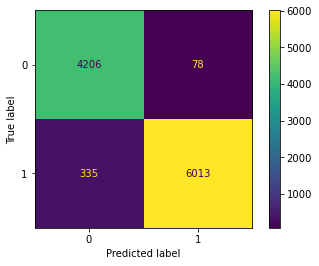

In [30]:
plot_confusion_matrix(uni_csvm1, testX1, testY)
plt.show()

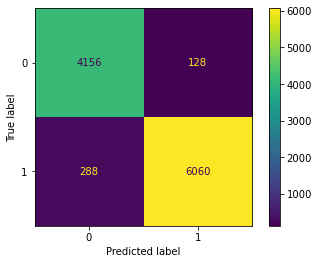

In [40]:
plot_confusion_matrix(uni_tfsvm1, testX1, testY)
plt.show()

In [41]:
print(classification_report(y_true = testY, y_pred = title_uni_csvm))
print(classification_report(y_true = testY, y_pred = title_uni_tfsvm))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4284
           1       0.99      0.95      0.97      6348

    accuracy                           0.96     10632
   macro avg       0.96      0.96      0.96     10632
weighted avg       0.96      0.96      0.96     10632

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4284
           1       0.98      0.95      0.97      6348

    accuracy                           0.96     10632
   macro avg       0.96      0.96      0.96     10632
weighted avg       0.96      0.96      0.96     10632



In [42]:
print(classification_report(y_true = testY, y_pred = title_bi_csvm))
print(classification_report(y_true = testY, y_pred = title_bi_tfsvm))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75      4284
           1       1.00      0.56      0.72      6348

    accuracy                           0.74     10632
   macro avg       0.80      0.78      0.74     10632
weighted avg       0.84      0.74      0.73     10632

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4284
           1       0.95      0.91      0.93      6348

    accuracy                           0.92     10632
   macro avg       0.91      0.92      0.92     10632
weighted avg       0.92      0.92      0.92     10632



In [43]:
print(classification_report(y_true = testY, y_pred = title_tri_csvm))
print(classification_report(y_true = testY, y_pred = title_tri_tfsvm))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4284
           1       1.00      0.32      0.48      6348

    accuracy                           0.59     10632
   macro avg       0.75      0.66      0.57     10632
weighted avg       0.80      0.59      0.56     10632

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      4284
           1       0.77      0.82      0.79      6348

    accuracy                           0.74     10632
   macro avg       0.73      0.72      0.73     10632
weighted avg       0.74      0.74      0.74     10632



In [44]:
print(classification_report(y_true = testY, y_pred = title_uni_cnb))
print(classification_report(y_true = testY, y_pred = title_uni_tfnb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4284
           1       0.97      0.95      0.96      6348

    accuracy                           0.95     10632
   macro avg       0.95      0.95      0.95     10632
weighted avg       0.95      0.95      0.95     10632

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4284
           1       0.97      0.95      0.96      6348

    accuracy                           0.95     10632
   macro avg       0.95      0.95      0.95     10632
weighted avg       0.95      0.95      0.95     10632



In [45]:
print(classification_report(y_true = testY, y_pred = title_bi_cnb))
print(classification_report(y_true = testY, y_pred = title_bi_tfnb))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4284
           1       0.99      0.82      0.90      6348

    accuracy                           0.89     10632
   macro avg       0.89      0.91      0.89     10632
weighted avg       0.91      0.89      0.89     10632

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4284
           1       0.99      0.82      0.90      6348

    accuracy                           0.89     10632
   macro avg       0.89      0.91      0.89     10632
weighted avg       0.91      0.89      0.89     10632



In [46]:
print(classification_report(y_true = testY, y_pred = title_tri_cnb))
print(classification_report(y_true = testY, y_pred = title_tri_tfnb))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4284
           1       1.00      0.39      0.56      6348

    accuracy                           0.64     10632
   macro avg       0.76      0.70      0.63     10632
weighted avg       0.81      0.64      0.61     10632

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4284
           1       1.00      0.39      0.56      6348

    accuracy                           0.64     10632
   macro avg       0.76      0.70      0.63     10632
weighted avg       0.81      0.64      0.61     10632



In [47]:
print(classification_report(y_true = testY, y_pred = title_uni_cdt))
print(classification_report(y_true = testY, y_pred = title_uni_tfdt))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4284
           1       0.94      0.92      0.93      6348

    accuracy                           0.92     10632
   macro avg       0.91      0.92      0.91     10632
weighted avg       0.92      0.92      0.92     10632

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4284
           1       0.94      0.91      0.93      6348

    accuracy                           0.92     10632
   macro avg       0.91      0.92      0.91     10632
weighted avg       0.92      0.92      0.92     10632



In [48]:
print(classification_report(y_true = testY, y_pred = title_bi_cdt))
print(classification_report(y_true = testY, y_pred = title_bi_tfdt))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4284
           1       0.84      0.92      0.88      6348

    accuracy                           0.84     10632
   macro avg       0.85      0.83      0.83     10632
weighted avg       0.85      0.84      0.84     10632

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4284
           1       0.85      0.83      0.84      6348

    accuracy                           0.81     10632
   macro avg       0.80      0.80      0.80     10632
weighted avg       0.81      0.81      0.81     10632



In [49]:
print(classification_report(y_true = testY, y_pred = title_tri_cdt))
print(classification_report(y_true = testY, y_pred = title_tri_tfdt))

              precision    recall  f1-score   support

           0       0.87      0.36      0.51      4284
           1       0.69      0.96      0.80      6348

    accuracy                           0.72     10632
   macro avg       0.78      0.66      0.66     10632
weighted avg       0.76      0.72      0.68     10632

              precision    recall  f1-score   support

           0       0.84      0.36      0.50      4284
           1       0.69      0.95      0.80      6348

    accuracy                           0.71     10632
   macro avg       0.76      0.65      0.65     10632
weighted avg       0.75      0.71      0.68     10632



In [50]:
print(classification_report(y_true = testY, y_pred = text_uni_csvm))
print(classification_report(y_true = testY, y_pred = text_uni_tfsvm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       1.00      0.99      0.99      6348

    accuracy                           0.99     10632
   macro avg       0.99      0.99      0.99     10632
weighted avg       0.99      0.99      0.99     10632

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       1.00      0.99      0.99      6348

    accuracy                           0.99     10632
   macro avg       0.99      0.99      0.99     10632
weighted avg       0.99      0.99      0.99     10632



In [51]:
print(classification_report(y_true = testY, y_pred = text_bi_csvm))
print(classification_report(y_true = testY, y_pred = text_bi_tfsvm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4284
           1       0.99      0.99      0.99      6348

    accuracy                           0.99     10632
   macro avg       0.99      0.99      0.99     10632
weighted avg       0.99      0.99      0.99     10632

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      6348

    accuracy                           0.99     10632
   macro avg       0.99      0.99      0.99     10632
weighted avg       0.99      0.99      0.99     10632



In [52]:
print(classification_report(y_true = testY, y_pred = text_uni_cnb))
print(classification_report(y_true = testY, y_pred = text_uni_tfnb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4284
           1       0.97      0.92      0.94      6348

    accuracy                           0.93     10632
   macro avg       0.93      0.94      0.93     10632
weighted avg       0.94      0.93      0.93     10632

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4284
           1       0.97      0.92      0.94      6348

    accuracy                           0.93     10632
   macro avg       0.93      0.94      0.93     10632
weighted avg       0.94      0.93      0.93     10632



In [53]:
print(classification_report(y_true = testY, y_pred = text_bi_cnb))
print(classification_report(y_true = testY, y_pred = text_bi_tfnb))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4284
           1       0.99      0.90      0.94      6348

    accuracy                           0.93     10632
   macro avg       0.93      0.94      0.93     10632
weighted avg       0.94      0.93      0.93     10632

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4284
           1       0.99      0.90      0.94      6348

    accuracy                           0.93     10632
   macro avg       0.93      0.94      0.93     10632
weighted avg       0.94      0.93      0.93     10632



In [54]:
print(classification_report(y_true = testY, y_pred = text_uni_cdt))
print(classification_report(y_true = testY, y_pred = text_uni_tfdt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      6348

    accuracy                           1.00     10632
   macro avg       1.00      1.00      1.00     10632
weighted avg       1.00      1.00      1.00     10632

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      6348

    accuracy                           1.00     10632
   macro avg       1.00      1.00      1.00     10632
weighted avg       1.00      1.00      1.00     10632



In [55]:
print(classification_report(y_true = testY, y_pred = text_bi_cdt))
print(classification_report(y_true = testY, y_pred = text_bi_tfdt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4284
           1       0.97      0.97      0.97      6348

    accuracy                           0.96     10632
   macro avg       0.96      0.96      0.96     10632
weighted avg       0.96      0.96      0.96     10632

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4284
           1       0.97      0.96      0.97      6348

    accuracy                           0.96     10632
   macro avg       0.96      0.96      0.96     10632
weighted avg       0.96      0.96      0.96     10632



In [56]:
print(classification_report(y_true = testY, y_pred = ttitle_uni_csvm))
print(classification_report(y_true = testY, y_pred = ttitle_uni_tfsvm))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.80      0.50      0.38     10632
weighted avg       0.76      0.60      0.45     10632

              precision    recall  f1-score   support

           0       0.97      0.25      0.39      4284
           1       0.66      1.00      0.80      6348

    accuracy                           0.69     10632
   macro avg       0.82      0.62      0.60     10632
weighted avg       0.79      0.69      0.63     10632



In [57]:
print(classification_report(y_true = testY, y_pred = ttitle_bi_csvm))
print(classification_report(y_true = testY, y_pred = ttitle_bi_tfsvm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.30      0.50      0.37     10632
weighted avg       0.36      0.60      0.45     10632

              precision    recall  f1-score   support

           0       0.96      0.14      0.24      4284
           1       0.63      1.00      0.77      6348

    accuracy                           0.65     10632
   macro avg       0.80      0.57      0.51     10632
weighted avg       0.76      0.65      0.56     10632

C:\Users\jlee10\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(classification_report(y_true = testY, y_pred = ttitle_uni_cnb))
print(classification_report(y_true = testY, y_pred = ttitle_uni_tfnb))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      4284
           1       0.99      0.67      0.80      6348

    accuracy                           0.80     10632
   macro avg       0.83      0.83      0.80     10632
weighted avg       0.86      0.80      0.80     10632

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      4284
           1       0.99      0.67      0.80      6348

    accuracy                           0.80     10632
   macro avg       0.83      0.83      0.80     10632
weighted avg       0.86      0.80      0.80     10632



In [59]:
print(classification_report(y_true = testY, y_pred = ttitle_bi_cnb))
print(classification_report(y_true = testY, y_pred = ttitle_bi_tfnb))

              precision    recall  f1-score   support

           0       0.40      1.00      0.58      4284
           1       1.00      0.00      0.01      6348

    accuracy                           0.40     10632
   macro avg       0.70      0.50      0.29     10632
weighted avg       0.76      0.40      0.24     10632

              precision    recall  f1-score   support

           0       0.40      1.00      0.58      4284
           1       1.00      0.00      0.01      6348

    accuracy                           0.40     10632
   macro avg       0.70      0.50      0.29     10632
weighted avg       0.76      0.40      0.24     10632



In [60]:
print(classification_report(y_true = testY, y_pred = ttitle_uni_cdt))
print(classification_report(y_true = testY, y_pred = ttitle_uni_tfdt))

              precision    recall  f1-score   support

           0       0.96      0.01      0.01      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.78      0.50      0.38     10632
weighted avg       0.75      0.60      0.45     10632

              precision    recall  f1-score   support

           0       0.95      0.02      0.04      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.78      0.51      0.39     10632
weighted avg       0.74      0.60      0.46     10632



In [61]:
print(classification_report(y_true = testY, y_pred = ttitle_bi_cdt))
print(classification_report(y_true = testY, y_pred = ttitle_bi_tfdt))

              precision    recall  f1-score   support

           0       0.82      0.01      0.03      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.71      0.51      0.39     10632
weighted avg       0.69      0.60      0.46     10632

              precision    recall  f1-score   support

           0       0.77      0.02      0.04      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.68      0.51      0.39     10632
weighted avg       0.67      0.60      0.46     10632



In [62]:
print(classification_report(y_true = testY, y_pred = ttext_uni_csvm))
print(classification_report(y_true = testY, y_pred = ttext_uni_tfsvm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4284
           1       0.59      0.96      0.73      6348

    accuracy                           0.58     10632
   macro avg       0.29      0.48      0.37     10632
weighted avg       0.35      0.58      0.44     10632

              precision    recall  f1-score   support

           0       0.94      0.05      0.09      4284
           1       0.61      1.00      0.76      6348

    accuracy                           0.61     10632
   macro avg       0.78      0.52      0.42     10632
weighted avg       0.74      0.61      0.49     10632



In [63]:
print(classification_report(y_true = testY, y_pred = ttext_bi_csvm))
print(classification_report(y_true = testY, y_pred = ttext_bi_tfsvm))

              precision    recall  f1-score   support

           0       0.02      0.00      0.00      4284
           1       0.59      0.95      0.72      6348

    accuracy                           0.57     10632
   macro avg       0.30      0.48      0.36     10632
weighted avg       0.36      0.57      0.43     10632

              precision    recall  f1-score   support

           0       0.96      0.15      0.25      4284
           1       0.63      1.00      0.77      6348

    accuracy                           0.65     10632
   macro avg       0.80      0.57      0.51     10632
weighted avg       0.76      0.65      0.56     10632



In [64]:
print(classification_report(y_true = testY, y_pred = ttext_uni_cnb))
print(classification_report(y_true = testY, y_pred = ttext_uni_tfnb))

              precision    recall  f1-score   support

           0       0.83      0.26      0.40      4284
           1       0.66      0.96      0.78      6348

    accuracy                           0.68     10632
   macro avg       0.75      0.61      0.59     10632
weighted avg       0.73      0.68      0.63     10632

              precision    recall  f1-score   support

           0       0.83      0.26      0.40      4284
           1       0.66      0.96      0.78      6348

    accuracy                           0.68     10632
   macro avg       0.75      0.61      0.59     10632
weighted avg       0.73      0.68      0.63     10632



In [65]:
print(classification_report(y_true = testY, y_pred = ttext_bi_cnb))
print(classification_report(y_true = testY, y_pred = ttext_bi_tfnb))

              precision    recall  f1-score   support

           0       0.76      0.19      0.31      4284
           1       0.64      0.96      0.77      6348

    accuracy                           0.65     10632
   macro avg       0.70      0.58      0.54     10632
weighted avg       0.69      0.65      0.58     10632

              precision    recall  f1-score   support

           0       0.76      0.19      0.31      4284
           1       0.64      0.96      0.77      6348

    accuracy                           0.65     10632
   macro avg       0.70      0.58      0.54     10632
weighted avg       0.69      0.65      0.58     10632



In [66]:
print(classification_report(y_true = testY, y_pred = ttext_uni_cdt))
print(classification_report(y_true = testY, y_pred = ttext_uni_tfdt))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      4284
           1       0.75      0.50      0.60      6348

    accuracy                           0.60     10632
   macro avg       0.62      0.62      0.60     10632
weighted avg       0.65      0.60      0.60     10632

              precision    recall  f1-score   support

           0       0.49      0.30      0.37      4284
           1       0.63      0.79      0.70      6348

    accuracy                           0.59     10632
   macro avg       0.56      0.54      0.53     10632
weighted avg       0.57      0.59      0.57     10632



In [67]:
print(classification_report(y_true = testY, y_pred = ttext_bi_cdt))
print(classification_report(y_true = testY, y_pred = ttext_bi_tfdt))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35      4284
           1       0.64      0.88      0.74      6348

    accuracy                           0.63     10632
   macro avg       0.62      0.57      0.55     10632
weighted avg       0.62      0.63      0.58     10632

              precision    recall  f1-score   support

           0       0.66      0.08      0.15      4284
           1       0.61      0.97      0.75      6348

    accuracy                           0.61     10632
   macro avg       0.63      0.53      0.45     10632
weighted avg       0.63      0.61      0.51     10632



In [69]:
print(classification_report(y_true = testY, y_pred = text_tri_csvm))
print(classification_report(y_true = testY, y_pred = text_tri_tfsvm))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4284
           1       0.97      0.98      0.98      6348

    accuracy                           0.97     10632
   macro avg       0.97      0.97      0.97     10632
weighted avg       0.97      0.97      0.97     10632

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4284
           1       0.99      0.98      0.99      6348

    accuracy                           0.98     10632
   macro avg       0.98      0.98      0.98     10632
weighted avg       0.98      0.98      0.98     10632



In [70]:
print(classification_report(y_true = testY, y_pred = text_tri_cnb))
print(classification_report(y_true = testY, y_pred = text_tri_tfnb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4284
           1       1.00      0.85      0.92      6348

    accuracy                           0.91     10632
   macro avg       0.91      0.92      0.91     10632
weighted avg       0.93      0.91      0.91     10632

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4284
           1       1.00      0.85      0.92      6348

    accuracy                           0.91     10632
   macro avg       0.91      0.92      0.91     10632
weighted avg       0.93      0.91      0.91     10632



In [71]:
print(classification_report(y_true = testY, y_pred = text_tri_cdt))
print(classification_report(y_true = testY, y_pred = text_tri_tfdt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4284
           1       0.96      0.95      0.96      6348

    accuracy                           0.95     10632
   macro avg       0.95      0.95      0.95     10632
weighted avg       0.95      0.95      0.95     10632

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4284
           1       0.96      0.94      0.95      6348

    accuracy                           0.94     10632
   macro avg       0.93      0.94      0.94     10632
weighted avg       0.94      0.94      0.94     10632



In [72]:
print(classification_report(y_true = testY, y_pred = ttitle_tri_csvm))
print(classification_report(y_true = testY, y_pred = ttitle_tri_tfsvm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.30      0.50      0.37     10632
weighted avg       0.36      0.60      0.45     10632

              precision    recall  f1-score   support

           0       0.82      0.15      0.26      4284
           1       0.63      0.98      0.77      6348

    accuracy                           0.64     10632
   macro avg       0.73      0.56      0.51     10632
weighted avg       0.71      0.64      0.56     10632



In [73]:
print(classification_report(y_true = testY, y_pred = ttitle_tri_cnb))
print(classification_report(y_true = testY, y_pred = ttitle_tri_tfnb))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57      4284
           1       1.00      0.00      0.00      6348

    accuracy                           0.40     10632
   macro avg       0.70      0.50      0.29     10632
weighted avg       0.76      0.40      0.23     10632

              precision    recall  f1-score   support

           0       0.40      1.00      0.57      4284
           1       1.00      0.00      0.00      6348

    accuracy                           0.40     10632
   macro avg       0.70      0.50      0.29     10632
weighted avg       0.76      0.40      0.23     10632



In [75]:
print(classification_report(y_true = testY, y_pred = ttitle_tri_csdt))
print(classification_report(y_true = testY, y_pred = ttitle_tri_tfdt))

              precision    recall  f1-score   support

           0       0.74      0.01      0.01      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.67      0.50      0.38     10632
weighted avg       0.65      0.60      0.45     10632

              precision    recall  f1-score   support

           0       0.61      0.01      0.02      4284
           1       0.60      1.00      0.75      6348

    accuracy                           0.60     10632
   macro avg       0.60      0.50      0.38     10632
weighted avg       0.60      0.60      0.45     10632



In [76]:
print(classification_report(y_true = testY, y_pred = ttext_tri_csvm))
print(classification_report(y_true = testY, y_pred = ttext_tri_tfsvm))

              precision    recall  f1-score   support

           0       0.49      0.18      0.26      4284
           1       0.61      0.87      0.72      6348

    accuracy                           0.59     10632
   macro avg       0.55      0.53      0.49     10632
weighted avg       0.56      0.59      0.54     10632

              precision    recall  f1-score   support

           0       0.87      0.49      0.63      4284
           1       0.74      0.95      0.83      6348

    accuracy                           0.77     10632
   macro avg       0.80      0.72      0.73     10632
weighted avg       0.79      0.77      0.75     10632



In [77]:
print(classification_report(y_true = testY, y_pred = ttext_tri_cnb))
print(classification_report(y_true = testY, y_pred = ttext_tri_tfnb))

              precision    recall  f1-score   support

           0       0.75      0.52      0.61      4284
           1       0.73      0.88      0.80      6348

    accuracy                           0.74     10632
   macro avg       0.74      0.70      0.71     10632
weighted avg       0.74      0.74      0.72     10632

              precision    recall  f1-score   support

           0       0.75      0.52      0.61      4284
           1       0.73      0.88      0.80      6348

    accuracy                           0.74     10632
   macro avg       0.74      0.70      0.71     10632
weighted avg       0.74      0.74      0.72     10632



In [78]:
print(classification_report(y_true = testY, y_pred = ttext_tri_cdt))
print(classification_report(y_true = testY, y_pred = ttext_tri_tfdt))

              precision    recall  f1-score   support

           0       0.78      0.23      0.35      4284
           1       0.65      0.96      0.77      6348

    accuracy                           0.66     10632
   macro avg       0.72      0.59      0.56     10632
weighted avg       0.70      0.66      0.60     10632

              precision    recall  f1-score   support

           0       0.75      0.22      0.34      4284
           1       0.64      0.95      0.77      6348

    accuracy                           0.66     10632
   macro avg       0.69      0.58      0.55     10632
weighted avg       0.68      0.66      0.59     10632

